In [1]:
import numpy as np
import pandas as pd

In [7]:
!pip install chardet
import chardet

  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)


In [8]:
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

df = pd.read_csv('spam.csv', encoding=result['encoding'])

Windows-1252


In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [18]:
df['target']=encoder.fit_transform(df['target'])

In [19]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
df.duplicated().sum()

403

In [21]:
df=df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
#EDA(Exploratory Data Analysis)
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1f44f05cc50>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

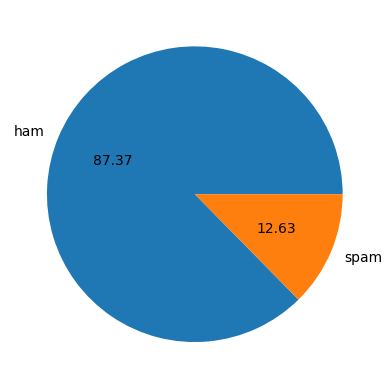

In [25]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Peash428\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [29]:
df['num_char']=df['text'].apply(len)

C:\Users\Peash428\AppData\Local\Temp\ipykernel_13780\1162800108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len)


In [32]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Peash428\AppData\Local\Temp\ipykernel_13780\3335927336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [34]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Peash428\AppData\Local\Temp\ipykernel_13780\3990380021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [35]:
df.head(2)

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [36]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target']==0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
df[df['target']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

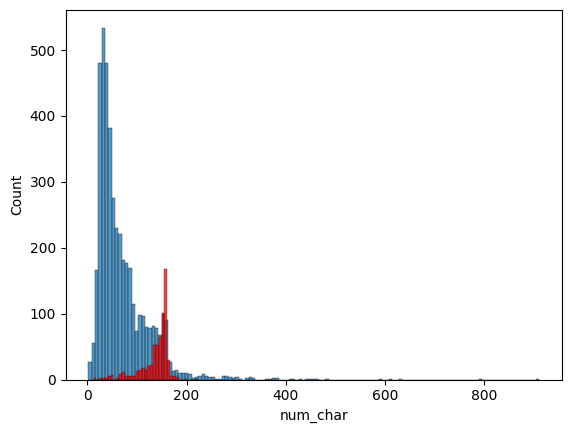

In [43]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

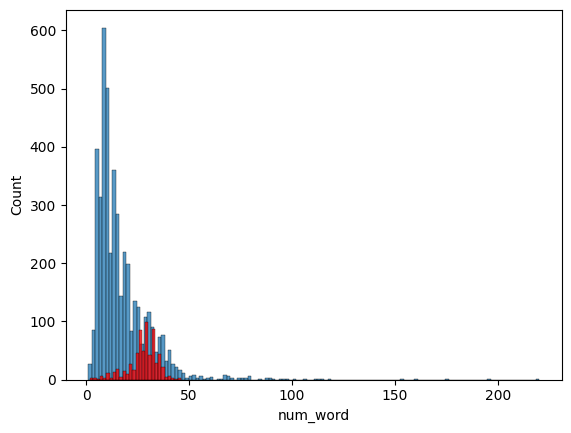

In [44]:
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

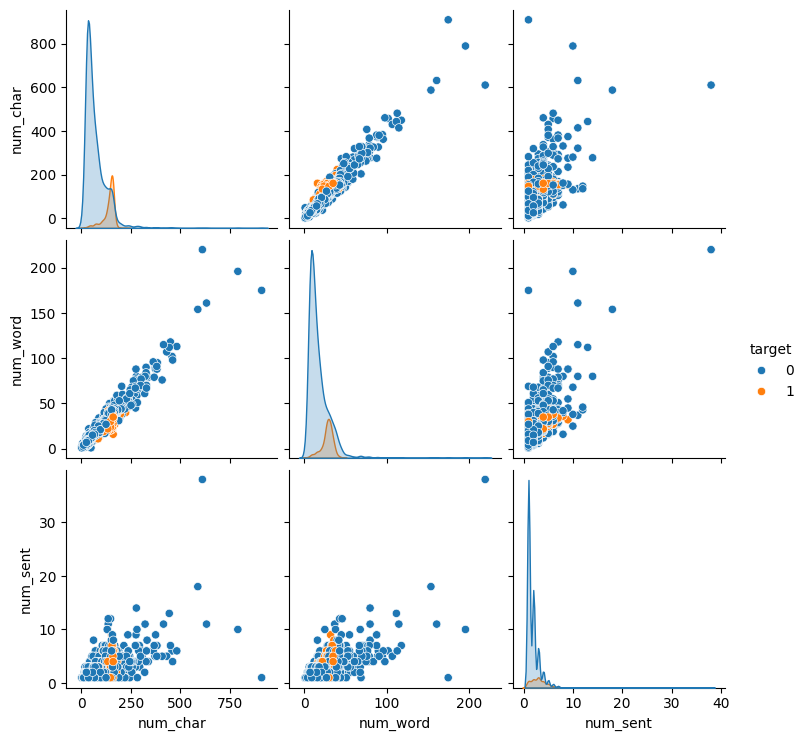

In [45]:
sns.pairplot(df,hue='target')

<Axes: >

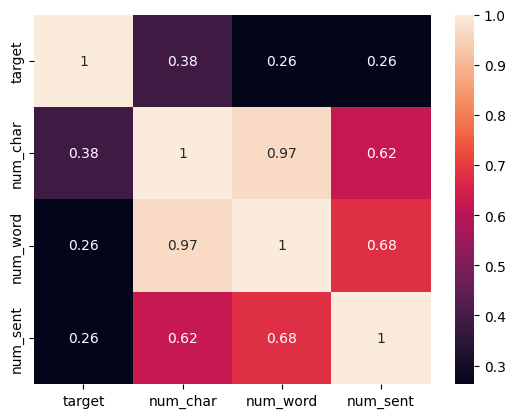

In [51]:
sns.heatmap(df.corr(numeric_only=['target','num_char','num_word','num_sent']),annot=True)

In [54]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Peash428\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [60]:
# Data Preprocessing
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(ps.stem(i))

    return " ".join(y)


In [62]:
transform('i loved YT lectures on Machine Learning. How about you?')


'love yt lectur machin learn'

In [63]:
df['trans']=df['text'].apply(transform)

In [64]:
df.head()

,target,text,num_char,num_word,num_sent,trans
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [68]:
spam_wc=wc.generate(df[df['target']==1]['trans'].str.cat(sep=" "))

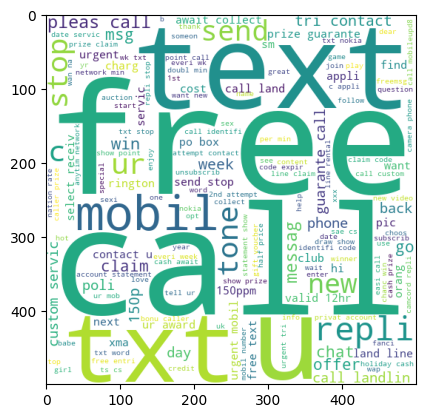

In [69]:
plt.imshow(spam_wc)

In [70]:
ham_wc=wc.generate(df[df['target']==0]['trans'].str.cat(sep=" "))

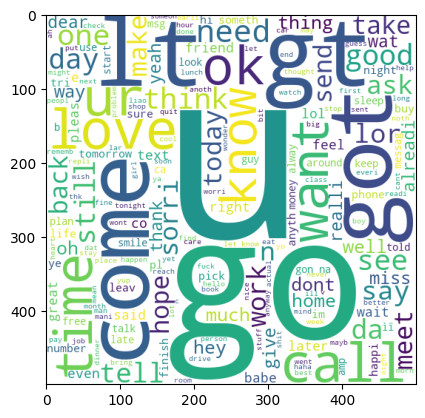

In [71]:
plt.imshow(ham_wc)

In [72]:
spam_corpus=[]

for msg in df[df['target']==1]['trans'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [77]:
from collections import Counter
df2=pd.DataFrame(Counter(spam_corpus).most_common(30))


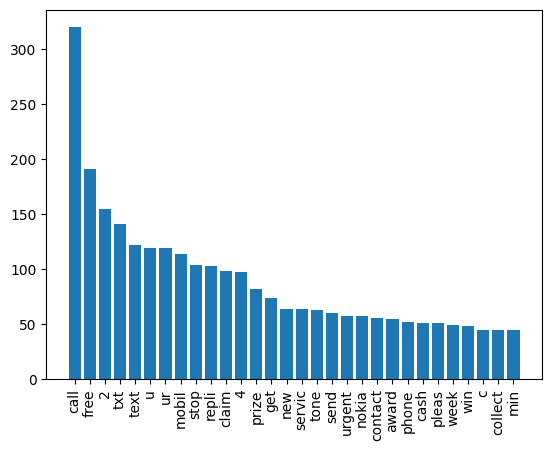

In [81]:
plt.bar(df2[0],df2[1])
plt.xticks(rotation='vertical')
plt.show()

In [86]:
ham_corpus=[]

for msg in df[df['target']==0]['trans'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


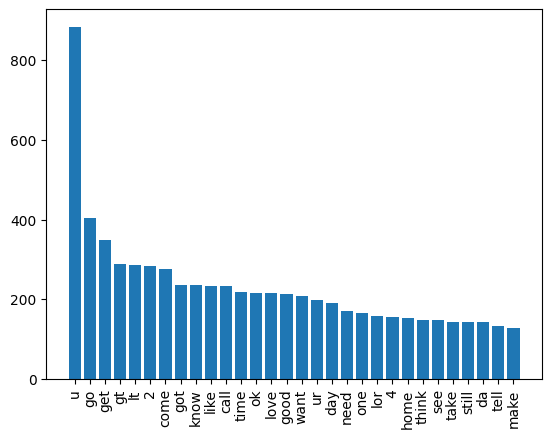

In [87]:

df3=pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.bar(df3[0],df3[1])
plt.xticks(rotation='vertical')
plt.show()


In [107]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()

In [108]:
X=tf.fit_transform(df['trans']).toarray()

In [109]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
y=df['target'].values

In [111]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [115]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [116]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [117]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [118]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
